In [ ]:
from bs4 import BeautifulSoup
from lxml import html
import requests
import pandas as pd
import numpy as np
import re

In [ ]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()
json.keys()


dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [ ]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [ ]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]

In [ ]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

<ipython-input-5-d2f8756adc31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)


In [ ]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

<ipython-input-6-f3497c573517>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)


In [ ]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)
slim_elements_df['selected_by_percent'] = slim_elements_df.selected_by_percent.astype(float)
slim_elements_df['total_points'] = slim_elements_df.total_points.astype(float)

<ipython-input-7-fabf7bd9133b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['value'] = slim_elements_df.value_season.astype(float)
<ipython-input-7-fabf7bd9133b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['selected_by_percent'] = slim_elements_df.selected_by_percent.astype(float)
<ipython-input-7-fabf7bd9133b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [ ]:
slim_elements_df.sort_values('value',ascending=False).head(10)
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]


In [ ]:
slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

,position,value
0,Defender,13.877778
1,Forward,11.915909
2,Goalkeeper,14.817647
3,Midfielder,12.103774


In [ ]:
pivot=slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,14.817647
0,Defender,13.877778
3,Midfielder,12.103774
1,Forward,11.915909


In [ ]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()

In [ ]:
team_pivot.sort_values('value',ascending=False)


,team,value
10,Man City,15.261905
7,Leeds,15.021053
17,West Ham,14.945000
1,Aston Villa,14.847368
8,Leicester,13.842857
4,Chelsea,13.780000
6,Everton,13.652381
0,Arsenal,13.382609
2,Brighton,13.160000
11,Man Utd,13.150000


In [ ]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

<AxesSubplot:>

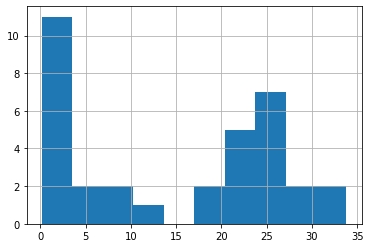

In [ ]:
goal_df.value.hist()


<AxesSubplot:>

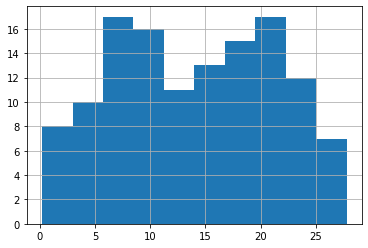

In [ ]:
def_df.value.hist()

In [ ]:
mid_df.sort_values('value',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
229,Dallas,Leeds,3,16.9,55,3410,0,31.1,171.0,Midfielder,31.1
241,Harrison,Leeds,3,5.4,60,2846,0,26.7,160.0,Midfielder,26.7
465,Soucek,West Ham,3,11.6,60,3420,0,24.5,147.0,Midfielder,24.5
372,Ward-Prowse,Southampton,3,4.1,65,3420,0,24.0,156.0,Midfielder,24.0
392,Son,Spurs,3,20.4,100,3119,0,22.8,228.0,Midfielder,22.8
34,Traoré,Aston Villa,3,2.0,60,2315,0,22.5,135.0,Midfielder,22.5
463,Bowen,West Ham,3,2.0,65,2556,0,21.7,141.0,Midfielder,21.7
398,Højbjerg,Spurs,3,2.9,50,3420,0,21.4,107.0,Midfielder,21.4
274,Gündogan,Man City,3,6.9,75,2025,0,20.9,157.0,Midfielder,20.9
466,Fornals,West Ham,3,0.5,60,2571,0,20.8,125.0,Midfielder,20.8


In [ ]:
def_df.sort_values('value',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
454,Cresswell,West Ham,2,19.6,55,3170,0,27.8,153.0,Defender,27.8
40,Targett,Aston Villa,2,9.9,50,3404,0,27.6,138.0,Defender,27.6
311,Wan-Bissaka,Man Utd,2,11.1,55,3060,0,26.2,144.0,Defender,26.2
87,Dunk,Brighton,2,7.0,50,2932,0,26.0,130.0,Defender,26.0
461,Coufal,West Ham,2,15.1,50,3054,0,25.6,128.0,Defender,25.6
39,Mings,Aston Villa,2,8.3,50,3194,0,25.6,128.0,Defender,25.6
183,Keane,Everton,2,3.0,50,2989,0,25.4,127.0,Defender,25.4
46,Konsa Ngoyo,Aston Villa,2,1.2,50,3195,0,23.8,119.0,Defender,23.8
286,Gato Alves Dias,Man City,2,27.6,60,2843,0,23.7,142.0,Defender,23.7
473,Coady,Wolves,2,8.5,45,3303,0,23.6,106.0,Defender,23.6


In [ ]:
fwd_df.sort_values('value',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
230,Bamford,Leeds,4,19.6,80,3052,0,24.2,194.0,Forward,24.2
41,Watkins,Aston Villa,4,18.1,75,3328,0,22.4,168.0,Forward,22.4
191,Calvert-Lewin,Everton,4,18.2,80,2871,0,20.6,165.0,Forward,20.6
117,Wood,Burnley,4,3.1,70,2741,0,19.7,138.0,Forward,19.7
376,Adams,Southampton,4,1.9,70,2662,0,19.6,137.0,Forward,19.6
390,Kane,Spurs,4,22.5,125,3083,0,19.4,242.0,Forward,19.4
321,Wilson,Newcastle,4,6.4,75,2081,0,17.9,134.0,Forward,17.9
204,Vardy,Leicester,4,11.6,105,2838,0,17.8,187.0,Forward,17.8
194,de Andrade,Everton,4,7.5,75,2862,0,16.4,123.0,Forward,16.4
55,Ings,Aston Villa,4,22.6,80,2172,0,16.4,131.0,Forward,16.4


In [ ]:
mid_df.sort_values('total_points',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
301,Borges Fernandes,Man Utd,3,47.0,120,3101,0,20.3,244.0,Midfielder,20.3
256,Salah,Liverpool,3,49.8,125,3077,0,18.5,231.0,Midfielder,18.5
392,Son,Spurs,3,20.4,100,3119,0,22.8,228.0,Midfielder,22.8
253,Mané,Liverpool,3,4.2,120,2808,0,14.7,176.0,Midfielder,14.7
305,Rashford,Man Utd,3,0.6,95,2917,0,18.3,174.0,Midfielder,18.3
229,Dallas,Leeds,3,16.9,55,3410,0,31.1,171.0,Midfielder,31.1
241,Harrison,Leeds,3,5.4,60,2846,0,26.7,160.0,Midfielder,26.7
274,Gündogan,Man City,3,6.9,75,2025,0,20.9,157.0,Midfielder,20.9
372,Ward-Prowse,Southampton,3,4.1,65,3420,0,24.0,156.0,Midfielder,24.0
279,Sterling,Man City,3,3.1,110,2534,0,14.0,154.0,Midfielder,14.0


In [ ]:
fwd_df.sort_values('total_points',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
390,Kane,Spurs,4,22.5,125,3083,0,19.4,242.0,Forward,19.4
230,Bamford,Leeds,4,19.6,80,3052,0,24.2,194.0,Forward,24.2
204,Vardy,Leicester,4,11.6,105,2838,0,17.8,187.0,Forward,17.8
41,Watkins,Aston Villa,4,18.1,75,3328,0,22.4,168.0,Forward,22.4
191,Calvert-Lewin,Everton,4,18.2,80,2871,0,20.6,165.0,Forward,20.6
251,Firmino,Liverpool,4,5.4,90,2837,0,15.7,141.0,Forward,15.7
117,Wood,Burnley,4,3.1,70,2741,0,19.7,138.0,Forward,19.7
376,Adams,Southampton,4,1.9,70,2662,0,19.6,137.0,Forward,19.6
321,Wilson,Newcastle,4,6.4,75,2081,0,17.9,134.0,Forward,17.9
3,Aubameyang,Arsenal,4,4.0,100,2330,0,13.1,131.0,Forward,13.1


In [ ]:
def_df.sort_values('total_points',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
257,Robertson,Liverpool,2,7.6,70,3384,0,23.0,161.0,Defender,23.0
260,Alexander-Arnold,Liverpool,2,30.9,75,3029,0,21.3,160.0,Defender,21.3
454,Cresswell,West Ham,2,19.6,55,3170,0,27.8,153.0,Defender,27.8
311,Wan-Bissaka,Man Utd,2,11.1,55,3060,0,26.2,144.0,Defender,26.2
286,Gato Alves Dias,Man City,2,27.6,60,2843,0,23.7,142.0,Defender,23.7
145,Chilwell,Chelsea,2,14.1,60,2286,0,23.2,139.0,Defender,23.2
40,Targett,Aston Villa,2,9.9,50,3404,0,27.6,138.0,Defender,27.6
280,Cancelo,Man City,2,7.8,60,2298,0,23.0,138.0,Defender,23.0
87,Dunk,Brighton,2,7.0,50,2932,0,26.0,130.0,Defender,26.0
39,Mings,Aston Villa,2,8.3,50,3194,0,25.6,128.0,Defender,25.6
